### Machine Learning Assignment on Prediction of car prices using Multiple Linear Regression 

In [350]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
#importing the CarPrice csv data into jupyter notebook
car_data = pd.read_csv('C:/Users/Sharath Jois/Downloads/CarPrice_Assignment.csv')
#Visualising the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [352]:
#checking the number of rows and columns in the dataset
car_data.shape

(205, 26)

In [353]:
#getting the description of the dataset
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [354]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [355]:
#Splitting company name from CarName column
CompanyName = car_data['CarName'].apply(lambda x : x.split(' ')[0])
car_data.insert(1,"CompanyName",CompanyName)
car_data.drop(['CarName'],axis=1,inplace=True)
car_data.head()

,car_ID,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [356]:
#listing the unique values in the CompanyName column
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [357]:
#converting the values to lowercase
car_data.CompanyName = car_data.CompanyName.str.lower()

#Replacing some values which are repeated in the column
def replace_name(a,b):
    car_data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [358]:
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

As some names of the car companies were repeated they were altered in the above step, so as to decrease the car company count

In [359]:
#Checking for duplicates
car_data.loc[cars.duplicated()]

,car_ID,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [360]:
#Listing all the columns in the dataset
car_data.columns

Index(['car_ID', 'CompanyName', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

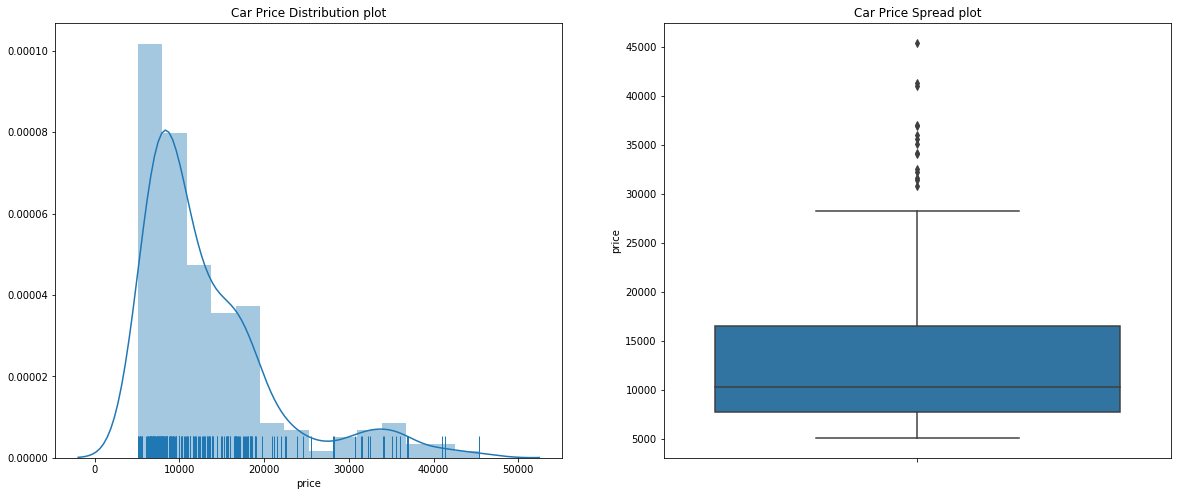

In [502]:
#ploting the count of car price and the distribution of price
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution plot')
sns.distplot(cars.price, rug = True)

plt.subplot(1,2,2)
plt.title('Car Price Spread plot')
sns.boxplot(y=cars.price)

plt.show()

From the above plot we can say that the cars with less price have larger count, which indicates most of the people like to buy cheap and best cars, and not to spend to much on cars. and about 75% of the cars price is below 16510.

In [362]:
#checking the different percentile values for the price column
car_data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.99,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
99%      40802.720000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

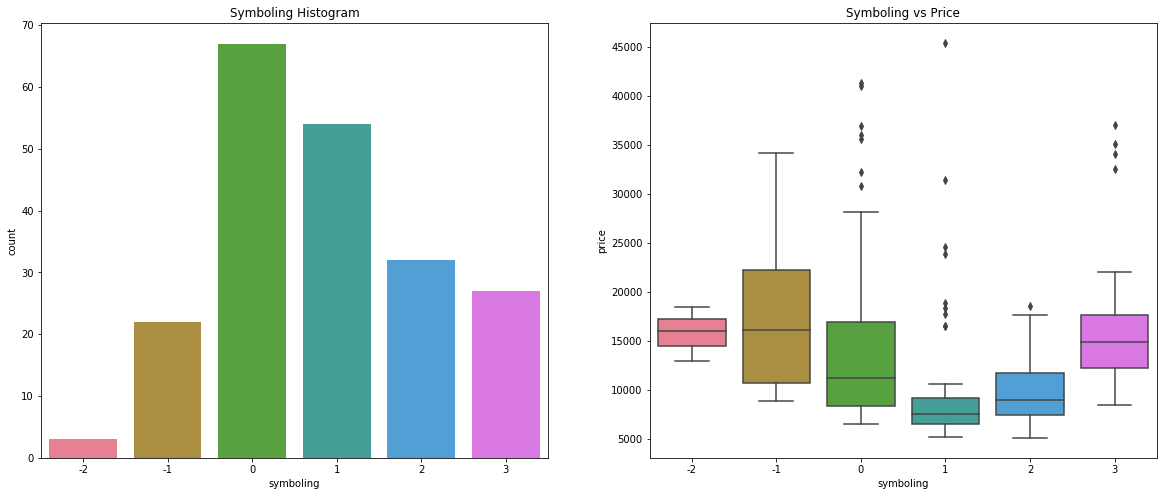

In [363]:
#ploting Symbolic spread of data and its varience wrt price
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(car_data.symboling, palette=("husl"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car_data.symboling, y=car_data.price, palette=("husl"))

plt.show()

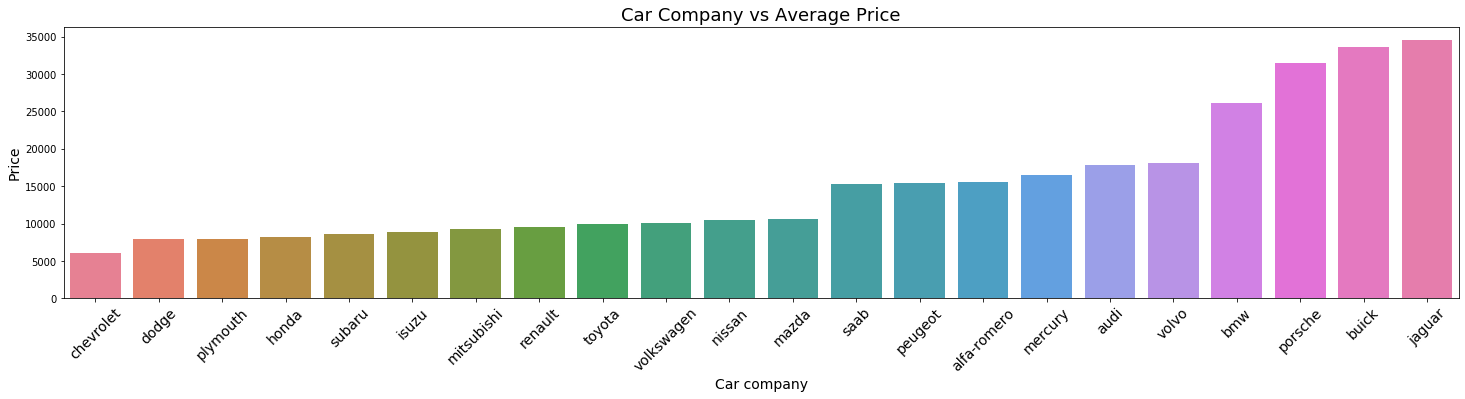

In [501]:
#plotting company wise average price of car

plt.figure(figsize=(25, 5))

df1 = pd.DataFrame(car_data.groupby(['CompanyName'])['price'].mean().sort_values())
df=df1.reset_index()
plot=sns.barplot(x="CompanyName", y="price", data=df, palette=("husl"))
plot.set_title('Car Company vs Average Price', size=18)
plot.set_xlabel('Car company', fontsize=14)
plot.set_ylabel('Price', fontsize=14)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45, size=14)
plt.show()

From the above graph we can state that Jaguar has the higgest average car price, followed by Buick, Porsche & BMW, Chevrolet is the one with lowest average prize

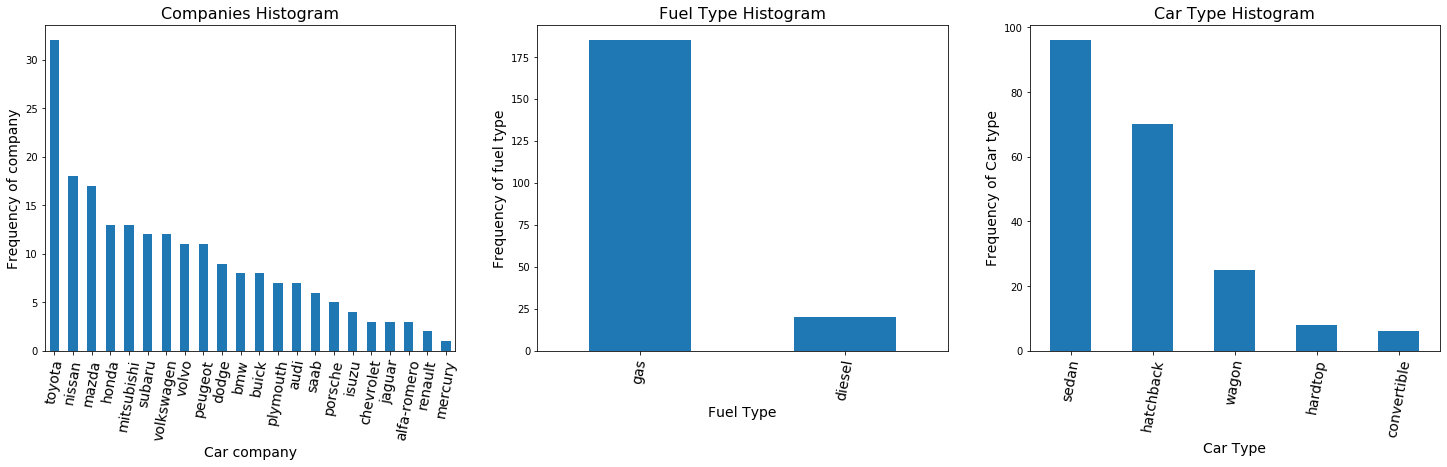

In [513]:
#plotting the highest number of Cars sold wrt Companies, wrt fuel type and wrt car type 
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car_data.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram',fontsize=16)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Frequency of company', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=80, size=14)


plt.subplot(1,3,2)
plt1 = car_data.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram',fontsize=16)
plt1.set_xlabel('Fuel Type', fontsize=14)
plt1.set_ylabel('Frequency of fuel type', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=80, size=14)


plt.subplot(1,3,3)
plt1 = car_data.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram',fontsize=16)
plt1.set_xlabel('Car Type', fontsize=14)
plt1.set_ylabel('Frequency of Car type', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=80, size=14)


plt.show()

Toyota is the one with higest car count, peoples used to prefer cars with gas as the fuel type more, and they prefer sedan type cars.

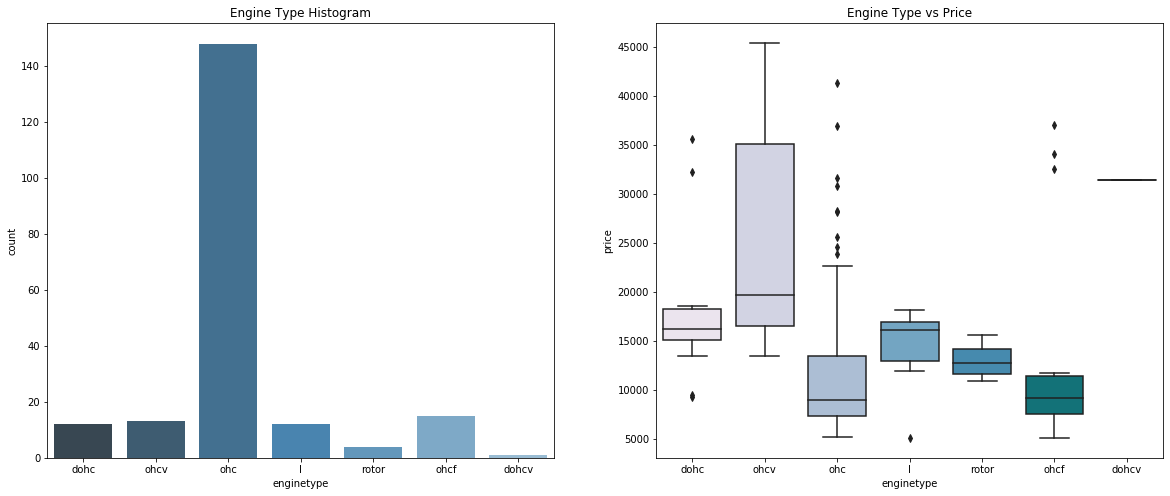

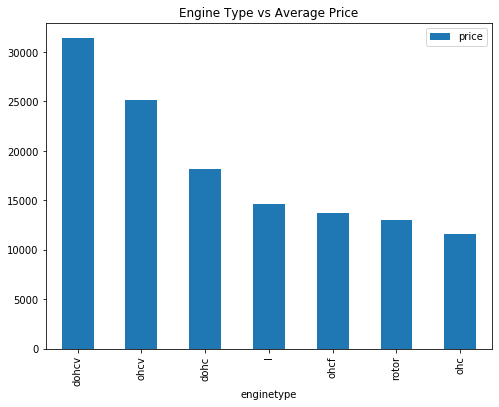

In [366]:
#Plotting wrt Engine types, engine type wrt price & engine type v/s average price
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(car_data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=car_data.enginetype, y=car_data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(car_data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

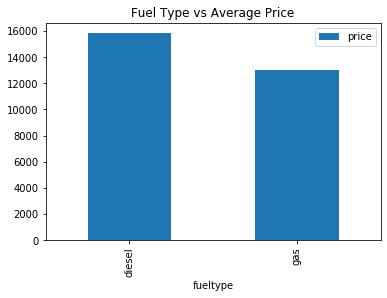

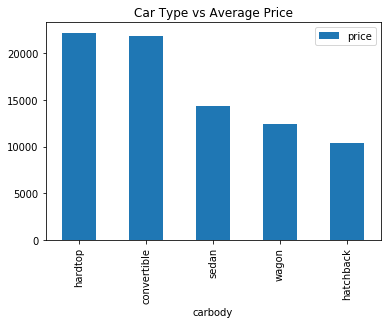

In [367]:
#ploting for Company Name vs Average Price, Fuel Type vs Average Price & Car Type vs Average Price
plt.figure(figsize=(25, 6))
df = pd.DataFrame(car_data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car_data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

diesel vehicles, Hardtop and convertible cars are of high price

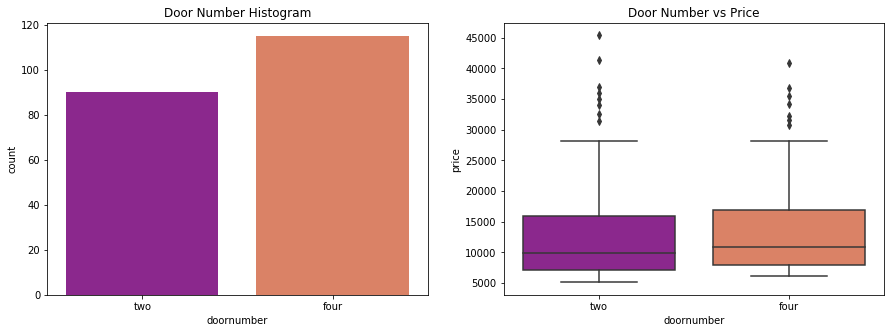

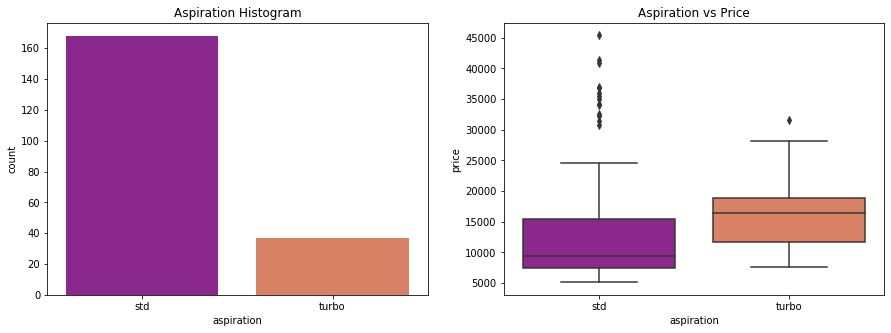

In [368]:
# ploting some of the features of the car wrt its price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car_data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_data.doornumber, y=car_data.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_data.aspiration, y=car_data.price, palette=("plasma"))

plt.show()

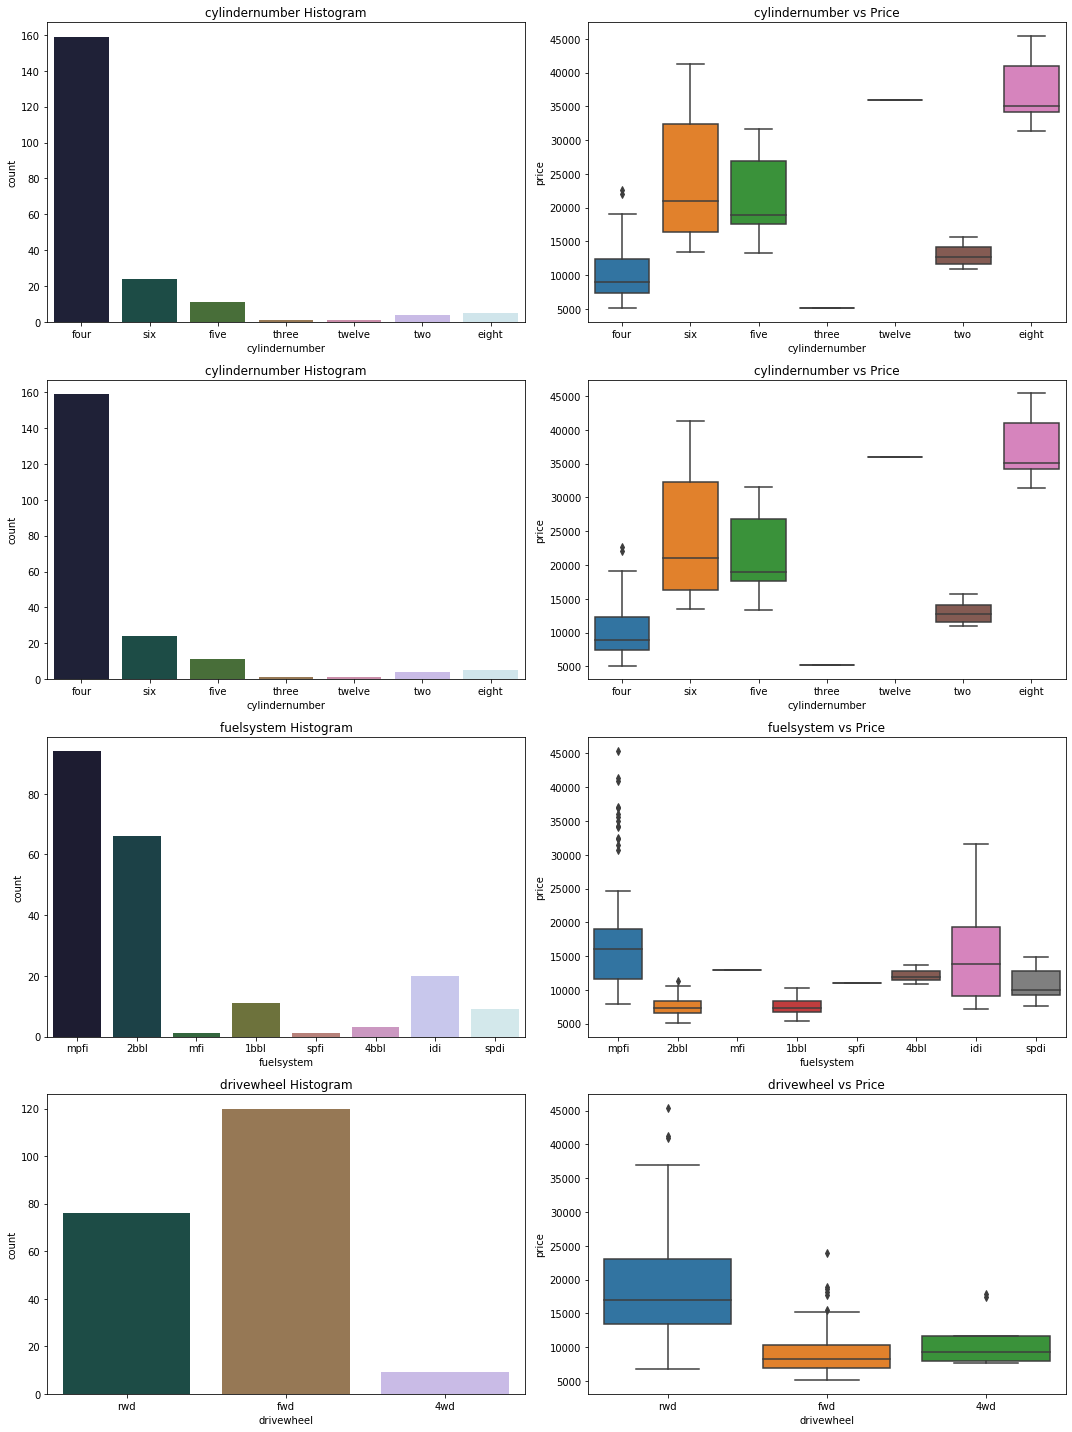

In [432]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
plt.title('cylindernumber Histogram')
sns.countplot(car_data.cylindernumber,palette=("cubehelix"))
plt.subplot(4,2,2)
plt.title('cylindernumber vs Price')
sns.boxplot(x=car_data.cylindernumber, y=car_data.price)

plt.subplot(4,2,3)
plt.title('cylindernumber Histogram')
sns.countplot(car_data.cylindernumber,palette=("cubehelix"))
plt.subplot(4,2,4)
plt.title('cylindernumber vs Price')
sns.boxplot(x=car_data.cylindernumber, y=car_data.price)

plt.subplot(4,2,5)
plt.title('fuelsystem Histogram')
sns.countplot(car_data.fuelsystem,palette=("cubehelix"))
plt.subplot(4,2,6)
plt.title('fuelsystem vs Price')
sns.boxplot(x=car_data.fuelsystem, y=car_data.price)

plt.subplot(4,2,7)
plt.title('drivewheel Histogram')
sns.countplot(car_data.drivewheel,palette=("cubehelix"))
plt.subplot(4,2,8)
plt.title('drivewheel vs Price')
sns.boxplot(x=car_data.drivewheel, y=car_data.price)

plt.tight_layout()

Text(0.5, 0, 'curbweight')

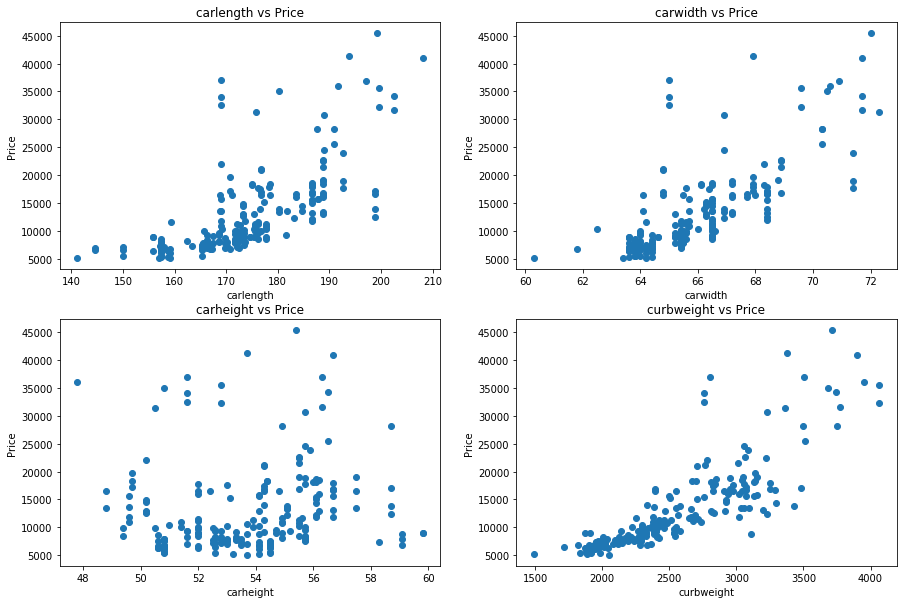

In [430]:
# plotting some features of the car wrt its count and wrt its price
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter('carlength','price', data = car_data)
plt.title('carlength vs Price')
plt.ylabel('Price')
plt.xlabel('carlength')

plt.subplot(2,2,2)
plt.scatter('carwidth','price', data = car_data)
plt.title('carwidth vs Price')
plt.ylabel('Price')
plt.xlabel('carwidth')

plt.subplot(2,2,3)
plt.scatter('carheight','price',data = car_data)
plt.title('carheight vs Price')
plt.ylabel('Price')
plt.xlabel('carheight')

plt.subplot(2,2,4)
plt.scatter('curbweight','price', data = car_data)
plt.title('curbweight vs Price')
plt.ylabel('Price')
plt.xlabel('curbweight')

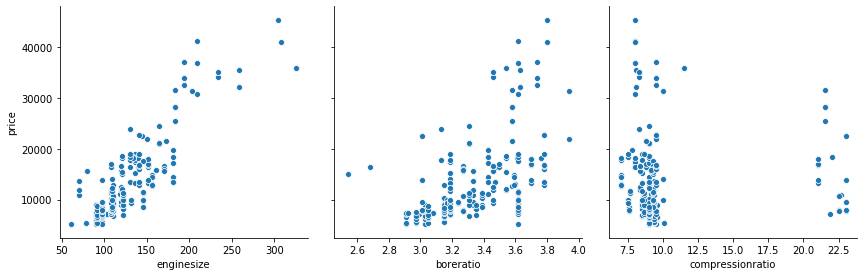

In [422]:
sns.pairplot(car_data, x_vars=['enginesize', 'boreratio', 'compressionratio'], y_vars='price',size=4, aspect=1, kind='scatter')

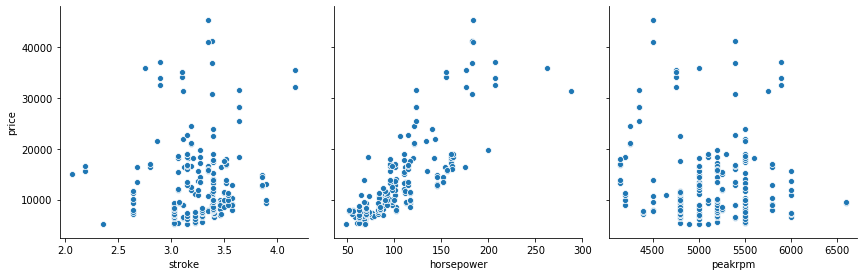

In [423]:
sns.pairplot(car_data, x_vars=['stroke', 'horsepower', 'peakrpm'], y_vars='price',size=4, aspect=1, kind='scatter')

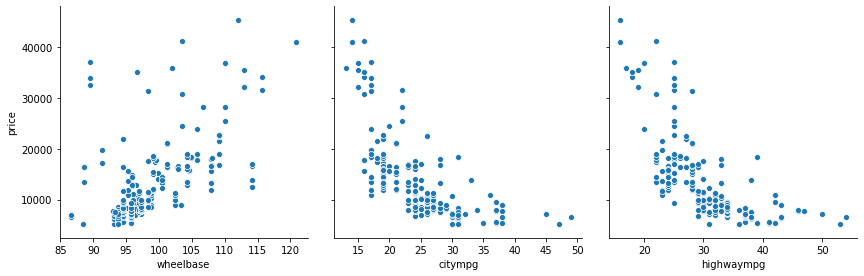

In [424]:
sns.pairplot(car_data, x_vars=['wheelbase', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')

In [372]:
# converting the price column to int and copy the dataset to df, group the company name wrt price and store it in table
car_data['price'] = car_data['price'].astype('int')
df = car_data.copy()
tab = df.groupby(['CompanyName'])['price'].mean()

In [373]:
tab.head()

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
Name: price, dtype: float64

In [374]:
df = df.merge(tab.reset_index(), how='left',on='CompanyName')

In [375]:
df.head()

,car_ID,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,15498.333333
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,15498.333333
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,15498.333333
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,17859.142857
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,17859.142857


In [376]:
#Binning the Car Companies based on avg prices of each Company.
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium_range','Highend']
car_data['carsrange'] = pd.cut(df['price_y'],bins=bins,labels=cars_bin)
car_data.head()

,car_ID,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_range
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_range
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_range
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_range
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_range


In [377]:
car_data[car_data['price']>40000]

,car_ID,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
16,17,bmw,0,gas,std,two,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315,Highend
73,74,buick,0,gas,std,four,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960,Highend
74,75,buick,1,gas,std,two,hardtop,rwd,front,112.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400,Highend


In [443]:
car_data.columns

Index(['car_ID', 'CompanyName', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carsrange'],
      dtype='object')

In [450]:
#creating a df called cars_df
cars_df = car_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'highwaympg','citympg', 'carlength','carwidth', 'carsrange','peakrpm']]
cars_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,highwaympg,citympg,carlength,carwidth,carsrange,peakrpm
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,27,21,168.8,64.1,Medium_range,5000
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,27,21,168.8,64.1,Medium_range,5000
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,26,19,171.2,65.5,Medium_range,5000
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,30,24,176.6,66.2,Medium_range,5500
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,22,18,176.6,66.4,Medium_range,5500


<Figure size 1440x864 with 0 Axes>

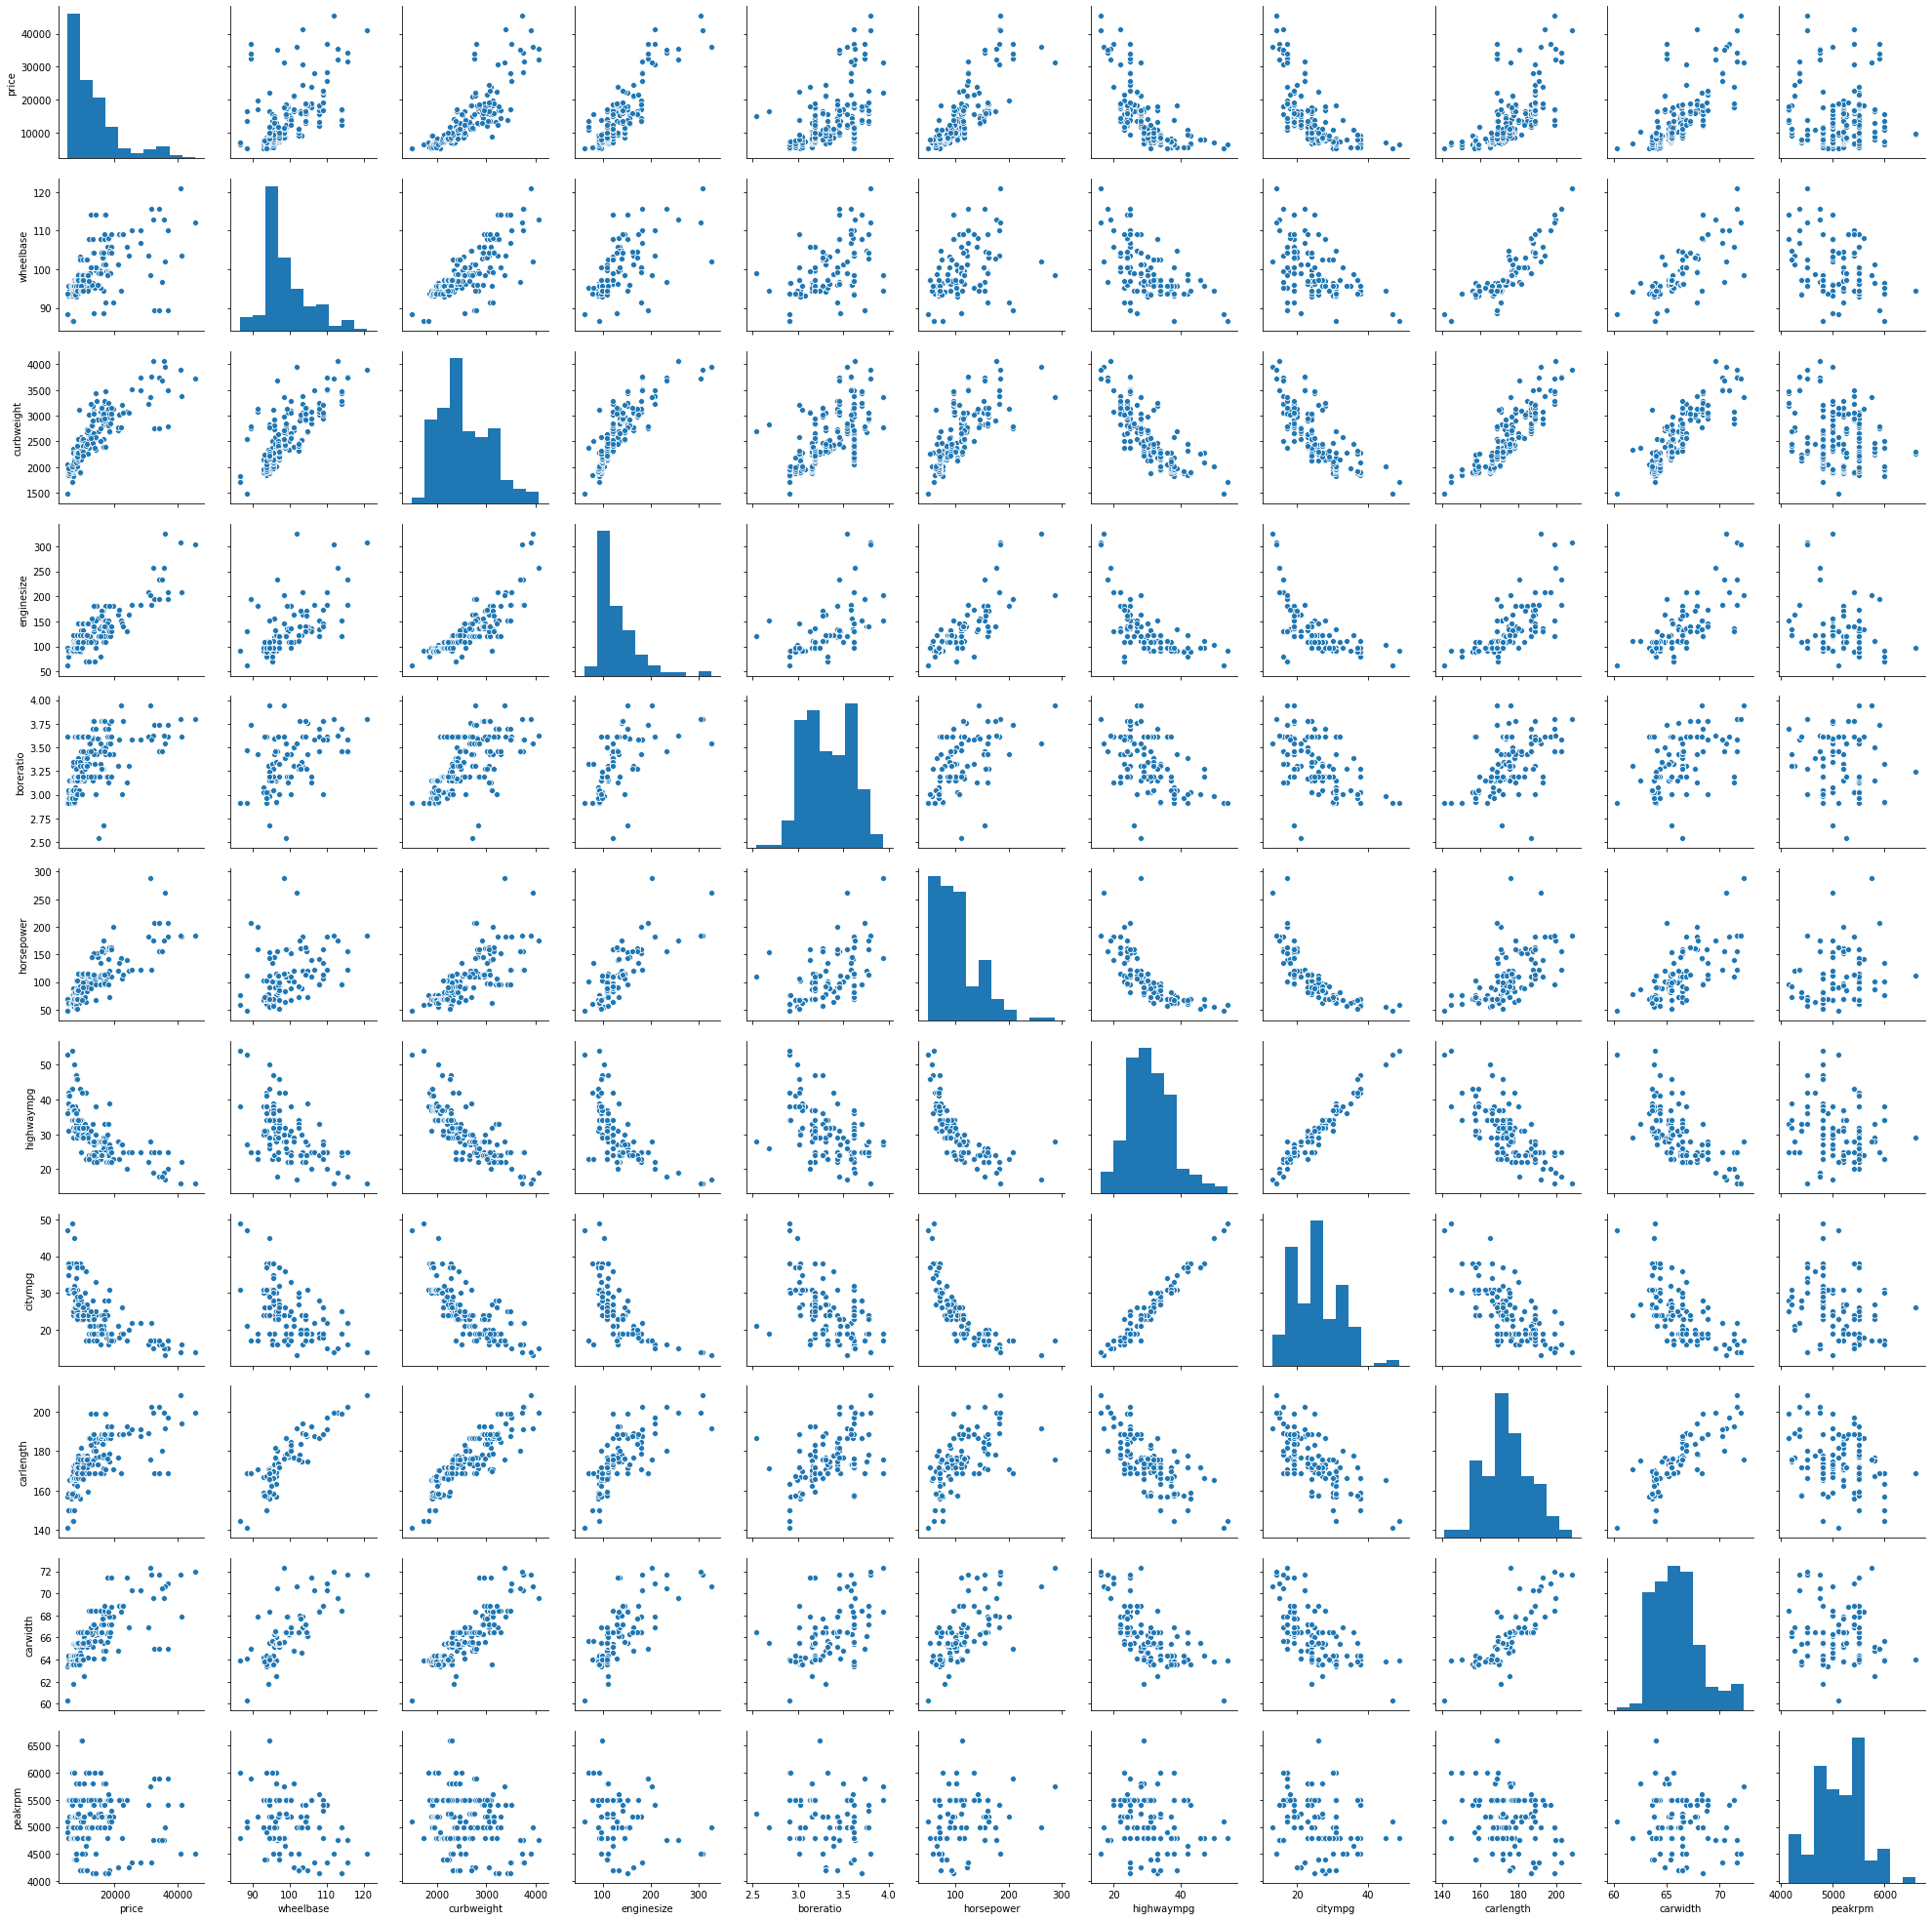

In [445]:
#checking the correlation of the variables
plt.figure(figsize=(20,12))
sns.pairplot(cars_df)
plt.show()

In [451]:
#creating dummy variables by creating a function called dummies and calling the variables into it
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_df = dummies('fueltype',cars_df)
cars_df = dummies('aspiration',cars_df)
cars_df = dummies('carbody',cars_df)
cars_df = dummies('drivewheel',cars_df)
cars_df = dummies('enginetype',cars_df)
cars_df = dummies('cylindernumber',cars_df)
cars_df = dummies('carsrange',cars_df)

In [452]:
# checking the cars_lr dataframe
cars_df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,carlength,carwidth,...,ohcv,rotor,five,four,six,three,twelve,two,Medium_range,Highend
0,13495,88.6,2548,130,3.47,111,27,21,168.8,64.1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,27,21,168.8,64.1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,26,19,171.2,65.5,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,30,24,176.6,66.2,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,22,18,176.6,66.4,...,0,0,1,0,0,0,0,0,1,0


In [453]:
#Checking the shape of the df
cars_df.shape

(205, 33)

In [454]:
#importing the sklearn library
from sklearn.model_selection import train_test_split
#splitting the dataset into test and train dataset
np.random.seed(0)
df_train, df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [456]:
from sklearn.preprocessing import MinMaxScaler
# appling MinMax scalling to the columns 
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','highwaympg','citympg','carlength','carwidth','price','peakrpm']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [457]:
# Visualizing the dataset
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,carlength,carwidth,...,ohcv,rotor,five,four,six,three,twelve,two,Medium_range,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.567568,0.500000,0.426016,0.291667,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.270270,0.166667,0.452033,0.666667,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.324324,0.361111,0.448780,0.308333,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.270270,0.222222,0.450407,0.316667,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.135135,0.111111,0.775610,0.575000,...,0,0,0,1,0,0,0,0,1,0


In [459]:
# Checking the description of the data
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,carlength,carwidth,...,ohcv,rotor,five,four,six,three,twelve,two,Medium_range,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.374976,0.344211,0.525476,0.461655,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.188477,0.186165,0.204848,0.184517,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.216216,0.166667,0.399187,0.304167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.378378,0.333333,0.502439,0.425000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.527027,0.500000,0.669919,0.550000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


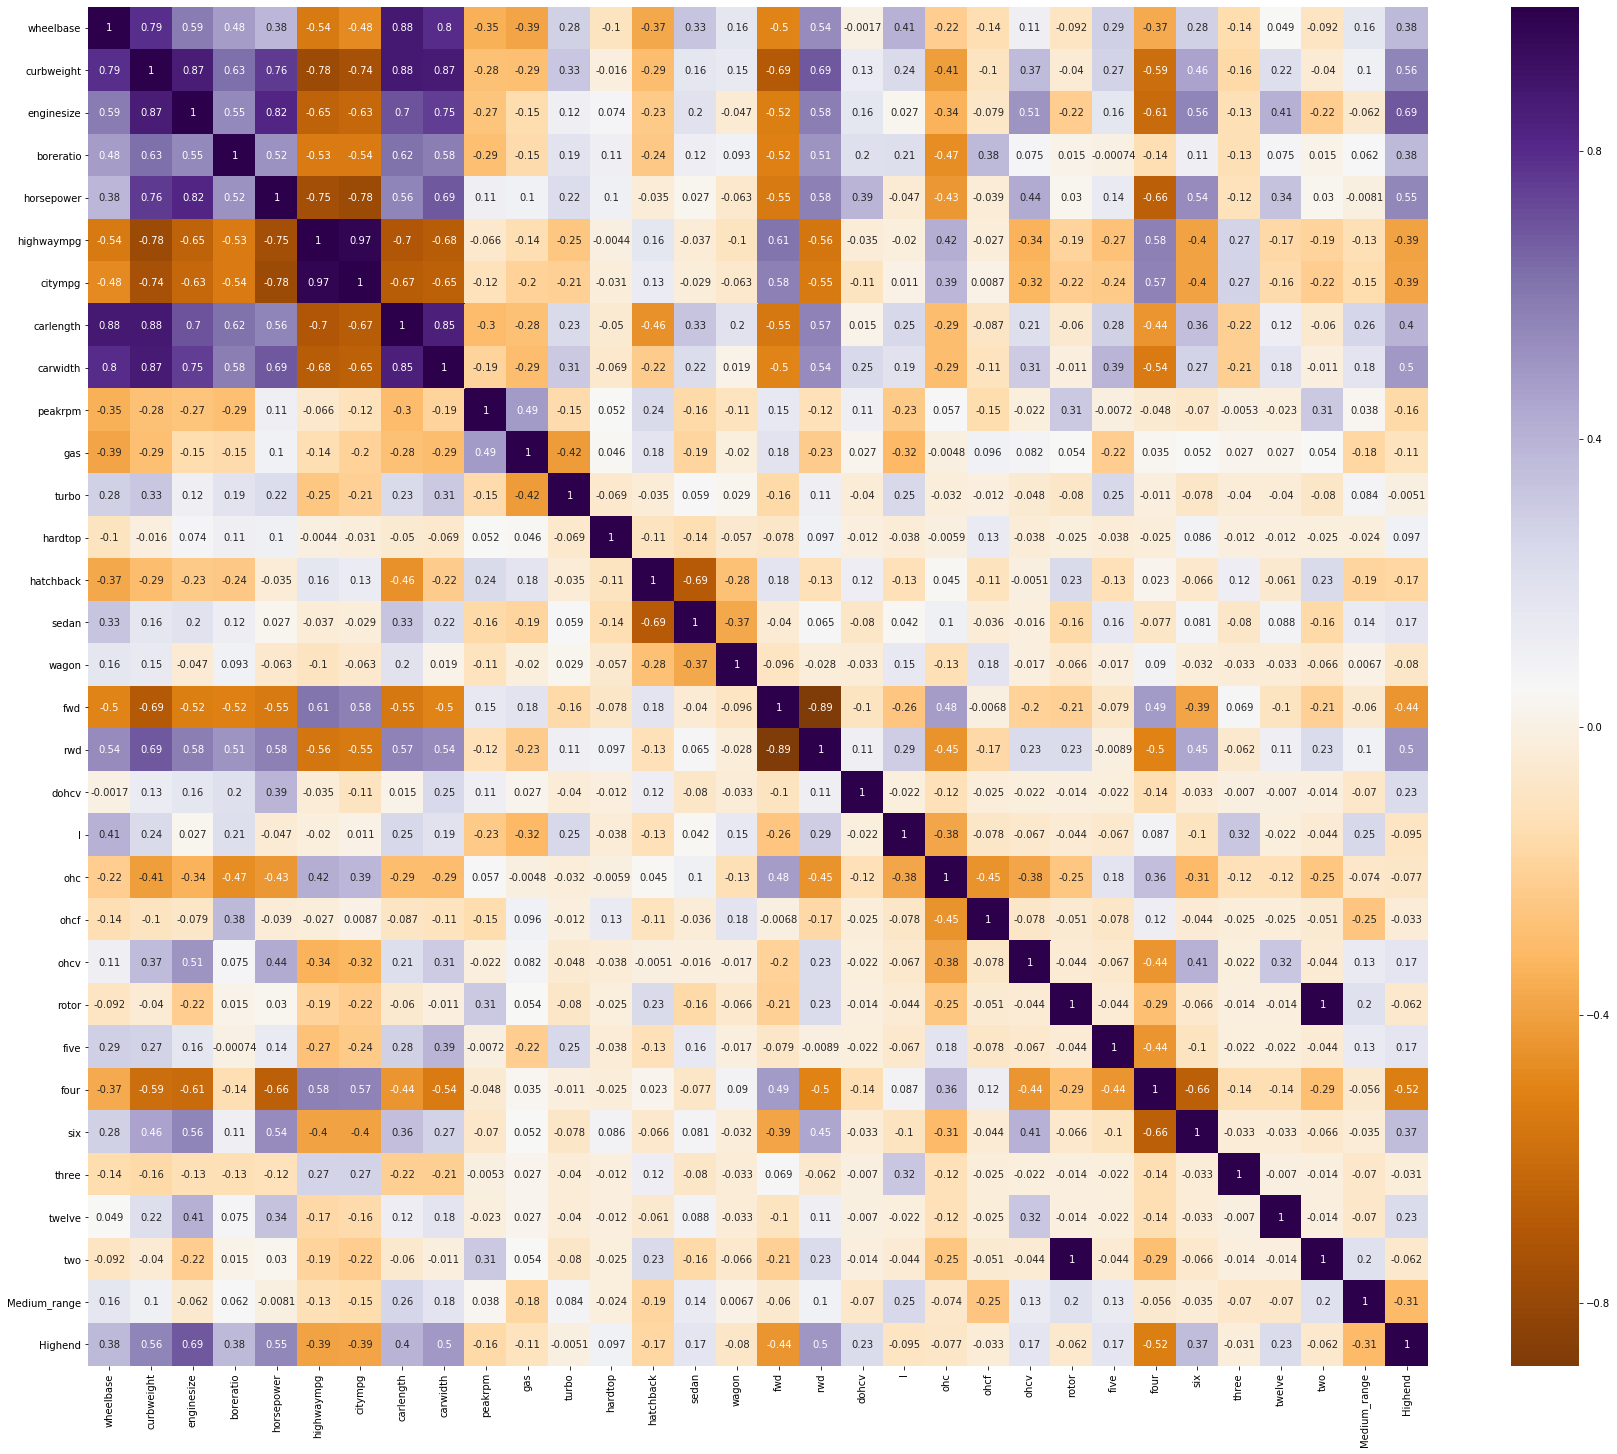

In [510]:
#ploting the Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="PuOr")
plt.show()

In [461]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [462]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [463]:
#applying automatic feature selection 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [464]:
#Listing all the columns which are selected by RFE wrt their rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('curbweight', True, 1),
 ('enginesize', False, 15),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('highwaympg', True, 1),
 ('citympg', False, 17),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('peakrpm', False, 2),
 ('gas', False, 18),
 ('turbo', False, 21),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 20),
 ('dohcv', True, 1),
 ('l', False, 23),
 ('ohc', False, 9),
 ('ohcf', False, 8),
 ('ohcv', False, 13),
 ('rotor', False, 19),
 ('five', False, 6),
 ('four', False, 5),
 ('six', False, 7),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 22),
 ('Medium_range', False, 11),
 ('Highend', True, 1)]

In [465]:
#listing all the columns that were selected finally
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'highwaympg', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [466]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'boreratio', 'citympg', 'carlength',
       'peakrpm', 'gas', 'turbo', 'hardtop', 'fwd', 'rwd', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'two', 'Medium_range'],
      dtype='object')

In [467]:
#creating a new dataframe called X_train_rfe and inporting all the data from X_train with only supported columns
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,highwaympg,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.567568,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.270270,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.324324,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.270270,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.135135,0.575000,0,0,1,0,0,0


In [468]:
#Creating 2 functions one for building the model and other for checking the VIF in order to achieve code reusability
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [469]:
#Calling the building function
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.58e-70
Time:                        20:46:15   Log-Likelihood:                 205.62
No. Observations:                 143   AIC:                            -389.2
Df Residuals:                     132   BIC:                            -356.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0928      0.043     -2.146      0.0

In [470]:
#dropping the 'twelve' column as it has high P-value
X_train_new = X_train_rfe.drop(["highwaympg"], axis = 1)

In [471]:
#Rebuilding the model
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.42e-71
Time:                        20:46:29   Log-Likelihood:                 204.13
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0352      0.026     -1.338      0.1

In [472]:
#dropping the 'highwaympg' column as it has high P-value
X_train_new = X_train_new.drop(["twelve"], axis = 1)

In [473]:
#Rebuilding the model
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.85e-72
Time:                        20:46:44   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [474]:
#calling the VIF function
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [475]:
#Droping the curbweight column wrt high VIF
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [476]:
#Rebuilding the model
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.70e-70
Time:                        20:47:00   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [477]:
# Checking the VIF
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


In [478]:
#Droping the column Sedan 
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [479]:
#Rebuilding the model
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.68e-69
Time:                        20:47:10   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [480]:
#Checking the VIF
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


In [481]:
#Droping the column Wagon wrt high p value and rebuilding the model
X_train_new = X_train_new.drop(["wagon"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.57e-70
Time:                        20:47:21   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [482]:
#Checking the VIF
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


In [483]:
#Dropping dohcv to see the changes in model statistics(as by droping the dohcv column we can achieve more R square value for the test dataset)
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.04e-67
Time:                        20:47:30   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


In [484]:
#fitting the model
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

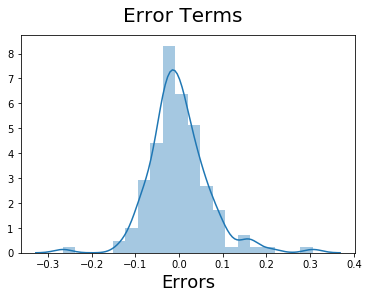

In [485]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # Plot Subheading

In [486]:
#creating a dataframe called num_vars with the same columns as of training dataset
num_vars = ['curbweight', 'horsepower', 'highwaympg', 'carwidth', 'hatchback','sedan', 'wagon', 'dohcv', 'twelve', 'Highend','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [487]:
#Creating the y_test and X_test
y_test = df_test.pop('price')
X_test = df_test

In [488]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [489]:
#Predicting the y test dataset wrt the data from x test
y_pred = lm.predict(X_test_new)

In [490]:
#Checking the R squared score on the test set
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022037

We can obesrve that for the training dataset we got an r square of 89.9 % and for the test dataset we got 86.1 %, there is a variation of 3 % which seems ok

Text(0, 0.5, 'y_pred')

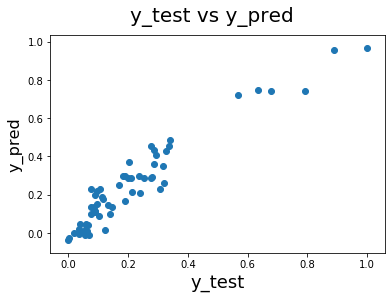

In [491]:
#Plotting the Y_test and Y_predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [492]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.04e-67
Time:                        20:52:08   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

Mainly 4 vairables mainly affects the price of the car from the analysis, which can be used in the ML model.
1.Horsepower 
2.carwidth 
3.hatchback 
4.Highend